In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import create_data as cd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df=cd.generate_imbalanced_data()
print(df.head())

   Applicant ID Education Level  Years of Experience  \
0             1      Bachelor's                   15   
1             2             PhD                   12   
2             3        Master's                   16   
3             4      Bachelor's                   19   
4             5       Associate                    8   

                       Skills  Gender Hired  
0          SQL, Data Analysis    Male   Yes  
1                      Python  Female    No  
2  SQL, Python, Data Analysis    Male   Yes  
3                 SQL, Python    Male   Yes  
4                 SQL, Python  Female    No  


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

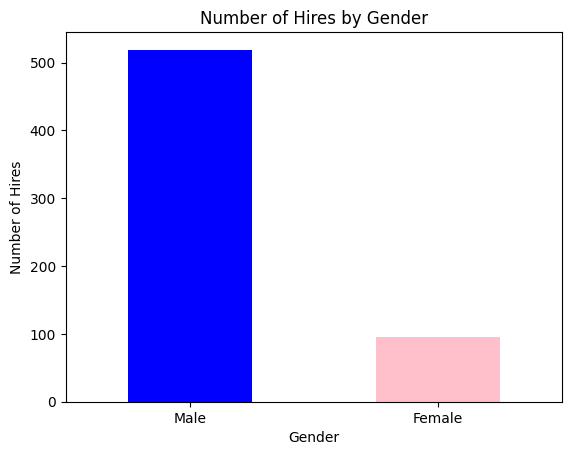

In [7]:

df_hired = df[df['Hired'] == 'Yes']
df_hired['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Hires by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Hires')
plt.xticks(rotation=0)

In [8]:
female_hiring_rate=df[df['Gender'] == 'Female']['Hired'].value_counts(normalize=True)['Yes']
male_hiring_rate=df[df['Gender'] == 'Male']['Hired'].value_counts(normalize=True)['Yes']
print ('Significantly higher male hiring rate may suggest bias in hiring process')
print(f'Male Hiring Rate: {male_hiring_rate:.2f}')
print(f'Female Hiring Rate: {female_hiring_rate:.2f}')


Significantly higher male hiring rate may suggest bias in hiring process
Male Hiring Rate: 0.90
Female Hiring Rate: 0.22


In [10]:
#Contingency Table
contingency_table = pd.crosstab(df['Gender'], df['Hired'],normalize='index')  
print(contingency_table)

Hired    No  Yes
Gender          
Female  330   95
Male     56  519


In [13]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['Hired'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'p-value: {p}')


Chi-Square Statistic: 472.63
p-value: 8.580456869897864e-105


In [15]:
# Average years of experience for hired males and females
avg_experience_male = df[(df['Gender'] == 'Male') & (df['Hired'] == 'Yes')]['Years of Experience'].mean()
avg_experience_female = df[(df['Gender'] == 'Female') & (df['Hired'] == 'Yes')]['Years of Experience'].mean()

print(f'Average Experience for Hired Males: {avg_experience_male:.2f}')
print(f'Average Experience for Hired Females: {avg_experience_female:.2f}')

Average Experience for Hired Males: 10.08
Average Experience for Hired Females: 9.48
